# Analyze and cars price prediction

## Introduction
US Cars'data was scraped from AUCTION EXPORT.com. This dataset included Information about 28 brands of clean and used vehicles for sale in US. Twelve features were assembled for each car in the dataset.

## Project goal
Goal of the project is to make customers easier to pick a car based on brand and model of car,year of car and how many kilometers car traveled. For this project we are going to use mini batch and stohastic gradient descent.

## Exploring data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm

In [2]:
df=pd.read_csv("USA_cars_datasets.csv")
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


### Column information
This dataset includes 12 features:
- Price	- the sale price of the vehicle in the ad
- Years	- the vehicle registration year
- Brand - the brand of car
- Model - model of the vehicle
- Color - color of the vehicle		
- Mileage - miles traveled by vehicle
- Vin - the vehicle identification number is a collection of 17 characters (digits and capital letters)
- Title Status - this feature included binary classification, which are clean title vehicles and salvage insurance
- Lot 	A lot number is an identification number assigned to a particular quantity or lot of material from a single manufacturer.For cars, a lot number is combined with a serial number to form the Vehicle Identification Number.
- State - The location in which the car is being available for purchase
- Country - country
- Condition - Time 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 175.8+ KB


In [4]:
df.isnull().sum()

Unnamed: 0      0
price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

In [5]:
df.shape

(2499, 13)

In [6]:
df.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


We can see that we have some cars that doesn't cost and also we have cars that pass over 1 milion miles. Before we  start to cleaning  our data we will make new column with kilometers.

In [7]:
#making new column with car travel in kilometers
df["kilometers"]=round(df["mileage"]/1.609)

#### Top five brands

In [8]:
top_5=df["brand"].value_counts()
top_5.head()

ford         1235
dodge         432
nissan        312
chevrolet     297
gmc            42
Name: brand, dtype: int64

#### Top 5 car models

In [9]:
top_5=df["model"].value_counts()
top_5.head()

door       651
f-150      219
doors      148
caravan    102
mpv         87
Name: model, dtype: int64

#### Title status 

In [10]:
df["title_status"].value_counts()

clean vehicle        2336
salvage insurance     163
Name: title_status, dtype: int64

We have only 163 cars with salvage insurance.

#### Cars from top 5 state

In [11]:
top_5=df["state"].value_counts()
top_5.head()

pennsylvania    299
florida         246
texas           214
california      190
michigan        169
Name: state, dtype: int64

Most of cars are from Pennsylvania.

#### Top 5 car colors

In [12]:
top_5=df["color"].value_counts()
top_5.head()

white     707
black     516
gray      395
silver    300
red       192
Name: color, dtype: int64

## Data visualization

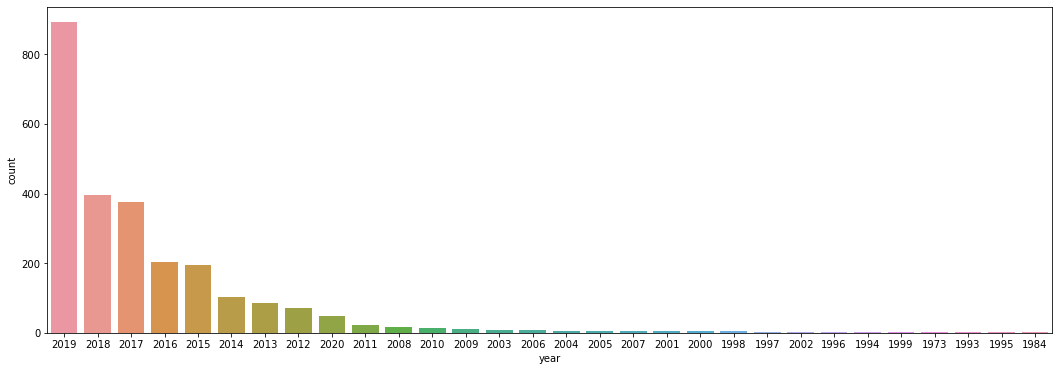

In [13]:
#plotting year count
plt.figure(figsize=(18,6))
sns.countplot(x='year', data=df, order = df['year'].value_counts().index)

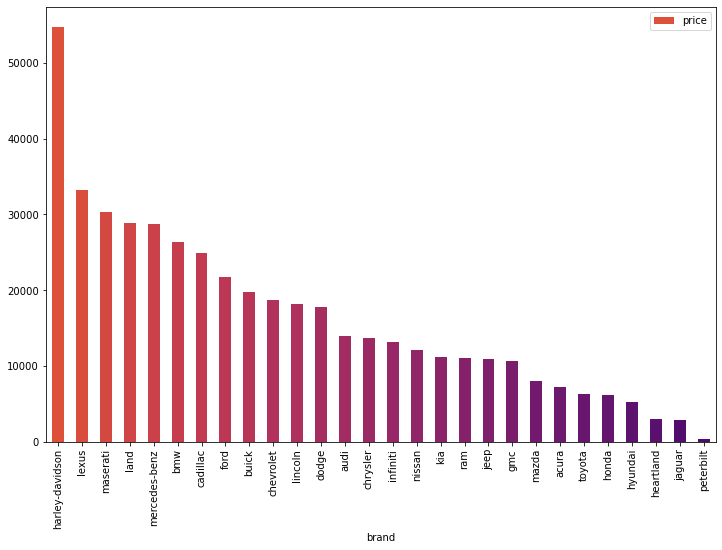

In [14]:
# Average price by car brands
country=df.groupby("brand")["price"].mean().reset_index("brand")
color = cm.inferno_r(np.linspace(.4, .8, 30))
country=country.sort_values("price" , ascending=[False])
country.plot.bar(x="brand", y='price', color=color , figsize=(12,8))

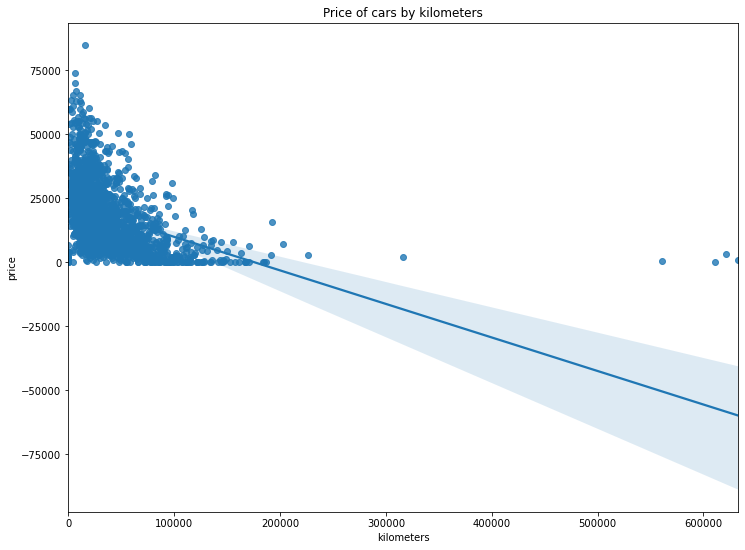

In [15]:
#Plotting car prices by kilometers
plt.figure(figsize=(12,9))
plt.ylabel("price")
plt.title("Price of cars by kilometers")
sns.regplot(x=df["kilometers"].astype("int64"),y=df["price"].astype("int64"))

We can see that prices of cars are higher if the car has low kilometers. We also see that we have outliers which we will deal after.

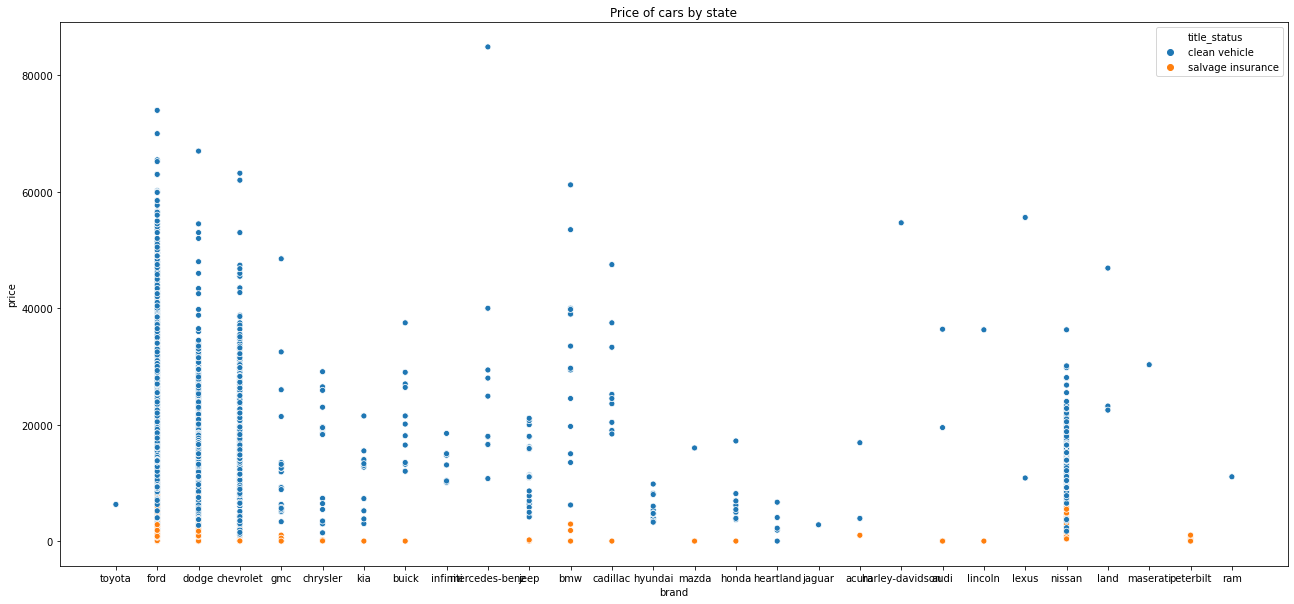

In [16]:
plt.figure(figsize=(22,10))
title="Price of cars by state"
sns.scatterplot(df.brand,df.price,hue=df.title_status).set_title(title)
plt.ioff()

We can see that cars with salvage insurance are cheaper.

### Outliers

We are going to use top 5 brand cars. First we will make dataframes with unique brands and in each dataframe search outliers for specific brand. After we remove all outliers we are going to combine those dataframes into one. Before we do that,we are going set the price of cars between 5 000 USD and 40 000 USD and traveled in range between 0 and 200 000 kilomters and also cars that are from 2010-2020,because we will assume that customers want reliable cars which cost more but also affordable. 

In [17]:
df2=df[df["price"].between(5000,40000)&(df["kilometers"].between(0,200000))&(df["year"].between(2010,2020))]

In [18]:
df2.shape

(2045, 14)

### Ford

In [19]:
ford=df2[df2["brand"]=="ford"]
ford.head(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,kilometers
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left,39867.0
9,9,5250,ford,mpv,2017,clean vehicle,63418.0,black,2fmpk3j92hbc12542,167656121,texas,usa,2 days left,39415.0
14,14,20700,ford,door,2013,clean vehicle,100757.0,black,1ftfw1et7dfa47790,167753916,virginia,usa,22 hours left,62621.0
18,18,5210,ford,mpv,2017,clean vehicle,35714.0,white,2fmpk3j95hbb73607,167656124,texas,usa,2 days left,22196.0
19,19,38100,ford,door,2013,clean vehicle,54380.0,gray,1ft8w3dt5deb68569,167753923,virginia,usa,22 hours left,33797.0
23,23,6180,ford,mpv,2017,clean vehicle,46010.0,blue,2fmpk3j84hbc09276,167656125,texas,usa,2 days left,28595.0
24,24,20800,ford,door,2013,clean vehicle,105510.0,silver,1ftfw1efxdfa01008,167753937,virginia,usa,22 hours left,65575.0
33,33,5330,ford,mpv,2017,clean vehicle,37792.0,no_color,2fmpk3j9xhbb56401,167656127,texas,usa,2 days left,23488.0
38,38,7320,ford,mpv,2017,clean vehicle,32366.0,gold,2fmpk4k96hbb16692,167656128,texas,usa,2 days left,20116.0
43,43,6330,ford,mpv,2017,clean vehicle,38123.0,red,2fmpk3j85hbb79415,167656129,texas,usa,2 days left,23694.0


We can see that ford mpv from 2013 with 62 621 kilomters costs 18 000 USD less then same car only with less kilometers (22 797). We will assume that car with less kilometer is overpriced so we will make condition to drop cars that are overpriced.

In [20]:
top10=ford["model"].value_counts()
top10.head(10)

door        260
f-150       207
doors        92
fusion       65
transit      41
escape       39
explorer     37
edge         34
flex         33
mustang      28
Name: model, dtype: int64

In [21]:
#Average price of particular model
door=ford[(ford["year"]<=2020)&(ford["model"]=="door")]
door["price"].describe()

count      260.000000
mean     16536.019231
std       8900.247846
min       5000.000000
25%       9000.000000
50%      13800.000000
75%      23776.500000
max      40000.000000
Name: price, dtype: float64

In [22]:
door.sample(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,kilometers
250,250,8600,ford,door,2016,clean vehicle,73321.0,white,1ftew1cf8gkd34592,167656733,texas,usa,2 days left,45569.0
1774,1774,6800,ford,door,2016,clean vehicle,66655.0,no_color,1fadp3f20gl369771,167610936,new jersey,usa,2 hours left,41426.0
1574,1574,7700,ford,door,2015,clean vehicle,54198.0,blue,3fa6p0h77fr138558,167788145,oklahoma,usa,21 hours left,33684.0
1415,1415,6000,ford,door,2015,clean vehicle,57345.0,gray,1fa6p0h72f5106961,167495679,missouri,usa,7 days left,35640.0
1586,1586,28500,ford,door,2016,clean vehicle,96129.0,white,1ft8w3dt6ged23165,167565003,oklahoma,usa,8 days left,59745.0
1663,1663,22500,ford,door,2015,clean vehicle,28801.0,black,1ftew1cp9fke05161,167793211,oklahoma,usa,2 days left,17900.0
329,329,24800,ford,door,2017,clean vehicle,46955.0,gray,1ftew1ef3hfc22483,167765337,michigan,usa,2 days left,29183.0
1851,1851,10500,ford,door,2014,salvage insurance,119689.0,white,1fdrf3bt6eea35761,167530309,idaho,usa,16 hours left,74387.0
1746,1746,7700,ford,door,2017,clean vehicle,85218.0,black,3fa6p0hd5hr138812,167605900,pennsylvania,usa,1 days left,52963.0
276,276,7570,ford,door,2016,clean vehicle,37252.0,white,1ftfx1ef0gkf25969,167656762,texas,usa,2 days left,23152.0


In [23]:
ford_d=ford[(ford.model=="door")&(ford.price.between(13500,23800))]  

In [24]:
len(ford_d)

70

In [25]:
#Average price of particular model
f_150=ford[(ford["year"]<=2020)&(ford["model"]=="f-150")]
f_150["price"].describe()

count      207.000000
mean     27096.898551
std       5223.685053
min       6500.000000
25%      23905.500000
50%      27102.000000
75%      29854.500000
max      40000.000000
Name: price, dtype: float64

In [26]:
f_150.sample(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,kilometers
1743,1743,26000,ford,f-150,2019,clean vehicle,33462.0,white,1ftew1c52kfa20803,167751797,virginia,usa,21 hours left,20797.0
2123,2123,30500,ford,f-150,2018,clean vehicle,56836.0,off-white,1ftfw1eg3jfa50880,167749076,pennsylvania,usa,3 days left,35324.0
1559,1559,28500,ford,f-150,2019,clean vehicle,14358.0,white,1ftfw1e57kfc13238,167745311,pennsylvania,usa,3 days left,8924.0
1362,1362,39500,ford,f-150,2019,clean vehicle,25071.0,yellow,1ftew1e51kkc05297,167781633,california,usa,21 hours left,15582.0
1533,1533,28500,ford,f-150,2019,clean vehicle,12260.0,white,1ftfw1e50kfc13209,167745203,pennsylvania,usa,3 days left,7620.0
1513,1513,28000,ford,f-150,2018,clean vehicle,5440.0,blue,1ftew1cp8jfd42703,167639660,texas,usa,10 days left,3381.0
469,469,23911,ford,f-150,2017,clean vehicle,25698.0,black,1ftew1cf3hfb78746,167765258,michigan,usa,20 hours left,15971.0
2125,2125,29500,ford,f-150,2018,clean vehicle,12271.0,gray,1ftfw1eg4jfe78490,167749164,pennsylvania,usa,3 days left,7626.0
1747,1747,23100,ford,f-150,2019,clean vehicle,23512.0,red,1ftew1c57kkc38467,167796798,nevada,usa,2 days left,14613.0
1536,1536,24700,ford,f-150,2019,clean vehicle,23795.0,silver,1ftew1c42kkd75453,167553736,california,usa,8 days left,14789.0


In [27]:
ford_f = ford[(ford.model=="f-150")&(ford.price.between(23000,30000))]

In [28]:
len(ford_f)

133

In [29]:
#Average price of particular model
doors=ford[(ford["year"]<=2020)&(ford["model"]=="doors")]
doors["price"].describe()

count       92.000000
mean     21176.804348
std       6894.546033
min       7340.000000
25%      15896.250000
50%      19469.000000
75%      26245.500000
max      35999.000000
Name: price, dtype: float64

In [30]:
doors.sample(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,kilometers
1889,1889,18500,ford,doors,2016,clean vehicle,45814.0,black,1fa6p8thxg5208671,167653515,new york,usa,11 days left,28474.0
2003,2003,13995,ford,doors,2015,clean vehicle,56703.0,oxford white,1fa6p8th8f5341198,167564839,new york,usa,9 days left,35241.0
1938,1938,24857,ford,doors,2018,clean vehicle,33815.0,shadow black,1fatp8uh3j5157023,167654214,massachusetts,usa,11 days left,21016.0
2028,2028,27990,ford,doors,2015,clean vehicle,19130.0,red,1fa6p8cf2f5362711,167564874,massachusetts,usa,9 days left,11889.0
2054,2054,17150,ford,doors,2015,clean vehicle,67091.0,black,2fmtk3ap9fbc28957,167565081,new jersey,usa,9 days left,41697.0
2044,2044,15600,ford,doors,2015,clean vehicle,54325.0,black,2fmtk3j86fbb54504,167565030,new york,usa,9 days left,33763.0
1995,1995,31831,ford,doors,2018,clean vehicle,14059.0,black,1fa6p8cf9j5125433,167654226,new jersey,usa,11 days left,8738.0
1994,1994,25998,ford,doors,2015,clean vehicle,25734.0,color:,1fa6p8cf9f5365377,167564815,new york,usa,9 days left,15994.0
2010,2010,13942,ford,doors,2015,clean vehicle,62542.0,magnetic metallic,1fatp8em4f5415097,167564843,new jersey,usa,9 days left,38870.0
2056,2056,14295,ford,doors,2015,clean vehicle,59391.0,guard,2fmtk4j87fbb34901,167565082,new jersey,usa,9 days left,36912.0


In [31]:
ford_ds = ford[(ford.model=="doors")&(ford.price.between(15000,26000))]

In [32]:
len(ford_ds)

51

In [33]:
#Average price of particular model
fusion=ford[(ford["year"]<=2020)&(ford["model"]=="fusion")]
fusion["price"].describe()

count       65.000000
mean     15269.569231
std       2475.858595
min       8500.000000
25%      13800.000000
50%      14900.000000
75%      16700.000000
max      23400.000000
Name: price, dtype: float64

In [34]:
fusion.sample(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,kilometers
1638,1638,20000,ford,fusion,2020,clean vehicle,23984.0,silver,3fa6p0cd0lr116667,167569992,virginia,usa,2 days left,14906.0
2182,2182,13700,ford,fusion,2019,clean vehicle,30471.0,red,3fa6p0lu8kr225408,167802368,north carolina,usa,2 days left,18938.0
1218,1218,9200,ford,fusion,2018,clean vehicle,71478.0,blue,3fa6p0h75jr243141,167772971,pennsylvania,usa,2 days left,44424.0
1366,1366,16800,ford,fusion,2019,clean vehicle,9910.0,red,3fa6p0hdxkr114772,167781638,california,usa,2 days left,6159.0
1684,1684,14100,ford,fusion,2019,clean vehicle,24272.0,white,3fa6p0lu1kr225363,167749844,michigan,usa,21 hours left,15085.0
1679,1679,14700,ford,fusion,2019,clean vehicle,35951.0,white,3fa6p0lu8kr117368,167570545,virginia,usa,2 days left,22344.0
1952,1952,14900,ford,fusion,2019,clean vehicle,40670.0,silver,3fa6p0cd1kr110357,167615301,minnesota,usa,14 hours left,25277.0
1557,1557,16900,ford,fusion,2019,clean vehicle,31261.0,gray,3fa6p0d93kr124089,167553768,california,usa,8 days left,19429.0
1409,1409,17300,ford,fusion,2019,clean vehicle,28070.0,white,3fa6p0cdxkr116450,167744186,north carolina,usa,Listing Expired,17446.0
1254,1254,16200,ford,fusion,2019,clean vehicle,41662.0,white,3fa6p0ru1kr120930,167725769,south carolina,usa,21 hours left,25893.0


In [35]:
ford_fs = ford[(ford.model=="fusion")&(ford.price.between(13500,16800))]

In [36]:
len(ford_fs)

46

In [37]:
#Average price of particular model
transit=ford[(ford["year"]<=2020)&(ford["model"]=="transit")]
transit["price"].describe()

count       41.000000
mean     23251.219512
std       3350.158351
min      16000.000000
25%      22600.000000
50%      23500.000000
75%      23900.000000
max      37500.000000
Name: price, dtype: float64

In [38]:
transit.sample(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,kilometers
2183,2183,18200,ford,transit,2018,clean vehicle,41569.0,white,1ftyr2cm2jka24227,167749395,pennsylvania,usa,2 days left,25835.0
1815,1815,23000,ford,transit,2019,clean vehicle,8985.0,white,1ftyr1zm1kka42480,167800253,north carolina,usa,2 days left,5584.0
1279,1279,23500,ford,transit,2019,clean vehicle,16009.0,white,1ftyr1zm8kka55050,167735020,michigan,usa,21 hours left,9950.0
1515,1515,23500,ford,transit,2019,clean vehicle,15759.0,white,1ftyr1ym0kka56663,167787255,oklahoma,usa,21 hours left,9794.0
1793,1793,30700,ford,transit,2019,clean vehicle,5250.0,white,1ftbw3xm3kka93802,167799910,texas,usa,2 days left,3263.0
1281,1281,23600,ford,transit,2019,clean vehicle,11004.0,white,1ftyr1zm3kka71267,167735025,michigan,usa,21 hours left,6839.0
1265,1265,20100,ford,transit,2018,clean vehicle,62386.0,white,1ftyr2xm7jkb19070,167722700,california,usa,1 days left,38773.0
1245,1245,23600,ford,transit,2019,clean vehicle,19363.0,white,1ftyr1ym8kka42378,167725759,south carolina,usa,21 hours left,12034.0
1228,1228,19500,ford,transit,2019,clean vehicle,34164.0,white,1ftyr2cm1kka61447,167722611,california,usa,1 days left,21233.0
1333,1333,25500,ford,transit,2019,clean vehicle,11251.0,white,1ftyr1zm2kka42617,167738248,illinois,usa,21 hours left,6993.0


In [39]:
ford_t = ford[(ford.model=="transit")&(ford.price.between(22000,24000))]

In [40]:
len(ford_t)

25

In [41]:
#Average price of particular model
maxx=ford[(ford["year"]<=2020)&(ford["model"]=="max")]
maxx["price"].describe()

count        9.000000
mean     34222.222222
std       6004.535323
min      18800.000000
25%      34800.000000
50%      35400.000000
75%      36400.000000
max      39200.000000
Name: price, dtype: float64

In [42]:
maxx.sample(9)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,kilometers
1705,1705,34800,ford,max,2019,clean vehicle,34277.0,silver,1fmjk1ht9kea27962,167796741,nevada,usa,2 days left,21303.0
2072,2072,38200,ford,max,2018,clean vehicle,46710.0,white,1fmjk1kt9jea41402,167745579,north carolina,usa,Listing Expired,29030.0
1875,1875,34400,ford,max,2019,clean vehicle,42506.0,gray,1fmjk1ht4kea17579,167801395,florida,usa,2 days left,26418.0
1734,1734,39200,ford,max,2019,clean vehicle,43617.0,black,1fmjk1jt7kea20776,167751588,tennessee,usa,21 hours left,27108.0
1885,1885,35400,ford,max,2019,clean vehicle,36167.0,white,1fmjk1ht1kea42603,167801400,florida,usa,2 days left,22478.0
1372,1372,36000,ford,max,2018,clean vehicle,58576.0,gray,1fmjk1jt1jea23803,167472824,wisconsin,usa,22 hours left,36405.0
1711,1711,36400,ford,max,2019,clean vehicle,36616.0,black,1fmjk1jt7kea20244,167796748,nevada,usa,2 days left,22757.0
1720,1720,34800,ford,max,2019,clean vehicle,35233.0,white,1fmjk1ht3kea17945,167796756,nevada,usa,2 days left,21897.0
1469,1469,18800,ford,max,2019,clean vehicle,25698.0,black,1fmjk1kt8kea43272,167745001,pennsylvania,usa,2 days left,15971.0


In [43]:
ford_m = ford[(ford.model=="max")&(ford.price.between(34000,36400))]

In [44]:
len(ford_m)

6

In [45]:
#Average price of particular model
explorer=ford[(ford["year"]<=2020)&(ford["model"]=="explorer")]
explorer["price"].describe()

count       37.000000
mean     25789.189189
std       4446.083407
min      12000.000000
25%      24700.000000
50%      25800.000000
75%      28300.000000
max      33000.000000
Name: price, dtype: float64

In [46]:
explorer.sample(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,kilometers
1922,1922,32500,ford,explorer,2019,clean vehicle,24126.0,black,1fm5k8gt2kgb41298,167801468,florida,usa,2 days left,14994.0
1728,1728,25500,ford,explorer,2019,clean vehicle,29850.0,gray,1fm5k7f81kgb42773,167796764,nevada,usa,2 days left,18552.0
2130,2130,26000,ford,explorer,2019,clean vehicle,32458.0,white,1fm5k7f83kga17399,167802226,north carolina,usa,2 days left,20173.0
1394,1394,25100,ford,explorer,2017,clean vehicle,25030.0,gold,1fm5k7d84hgd56068,167783118,california,usa,2 days left,15556.0
1739,1739,24700,ford,explorer,2019,clean vehicle,41628.0,silver,1fm5k7f87kgb11625,167796782,nevada,usa,2 days left,25872.0
1673,1673,25300,ford,explorer,2019,clean vehicle,44383.0,silver,1fm5k8f8xkgb26965,167749587,michigan,usa,21 hours left,27584.0
1217,1217,32500,ford,explorer,2020,clean vehicle,5920.0,silver,1fmsk8dh2lga15480,167722215,missouri,usa,21 hours left,3679.0
1276,1276,30700,ford,explorer,2017,clean vehicle,51107.0,red,1fm5k8ht2hgd13448,167779679,wisconsin,usa,21 hours left,31763.0
2101,2101,25600,ford,explorer,2019,clean vehicle,37166.0,gray,1fm5k7f85kgb16175,167802097,north carolina,usa,2 days left,23099.0
1246,1246,12000,ford,explorer,2016,clean vehicle,42902.0,black,1fm5k7bh1ggc33135,167777327,texas,usa,19 hours left,26664.0


In [47]:
ford_e = ford[(ford.model=="explorer")&(ford.price.between(24000,28500))]

In [48]:
len(ford_e)

22

In [49]:
#Average price of particular model
escape=ford[(ford["year"]<=2020)&(ford["model"]=="escape")]
escape["price"].describe()

count       39.000000
mean     14738.461538
std       3103.276315
min       9500.000000
25%      12700.000000
50%      15500.000000
75%      16400.000000
max      25200.000000
Name: price, dtype: float64

In [50]:
escape.sample(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,kilometers
1854,1854,15900,ford,escape,2019,clean vehicle,26040.0,white,1fmcu0gd7kuc06417,167615138,minnesota,usa,14 hours left,16184.0
1863,1863,16500,ford,escape,2019,clean vehicle,18454.0,white,1fmcu0gd3kub08839,167801389,florida,usa,2 days left,11469.0
1763,1763,12600,ford,escape,2018,clean vehicle,40375.0,gray,1fmcu0gd0juc90126,167798137,nevada,usa,2 days left,25093.0
1718,1718,13900,ford,escape,2019,clean vehicle,36978.0,blue,1fmcu0gd2kub10601,167796755,nevada,usa,2 days left,22982.0
1612,1612,10000,ford,escape,2017,clean vehicle,35021.0,silver,1fmcu9gd8hud43346,167567564,colorado,usa,8 days left,21766.0
2100,2100,10200,ford,escape,2018,clean vehicle,93350.0,black,1fmcu9gd2jua74282,167749030,pennsylvania,usa,2 days left,58017.0
1697,1697,14400,ford,escape,2019,clean vehicle,17510.0,black,1fmcu0f72kub34778,167750837,texas,usa,21 hours left,10883.0
1484,1484,15600,ford,escape,2019,clean vehicle,37106.0,blue,1fmcu0gd5kua05504,167551072,missouri,usa,9 days left,23062.0
1723,1723,18800,ford,escape,2019,clean vehicle,15835.0,green,1fmcu9gd1kub80952,167751575,virginia,usa,21 hours left,9842.0
1722,1722,16300,ford,escape,2019,clean vehicle,37044.0,white,1fmcu9hdxkub65946,167796758,nevada,usa,1 hours left,23023.0


In [51]:
ford_es = ford[(ford.model=="escape")&(ford.price.between(12000,16500))]

In [52]:
len(ford_es)

22

In [53]:
# Combininig all into one df
dfs=[ford_d,ford_ds,ford_e,ford_es,ford_m,ford_t,ford_fs,ford_f]
ford_c=pd.concat(dfs)
ford_clean=ford_c.sample(frac=1).reset_index(drop=True)

In [54]:
ford_clean.shape

(375, 14)

### Dodge

In [55]:
dodge=df2[df2["brand"]=="dodge"]
dodge.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,kilometers
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,24605.0
5,5,5700,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left,28316.0
48,48,5580,dodge,mpv,2017,clean vehicle,46829.0,gray,3c4pddeg7ht595704,167656130,texas,usa,2 days left,29104.0
94,94,39800,dodge,challenger,2015,clean vehicle,3641.0,white,2c3cdzc95fh757310,167755377,pennsylvania,usa,2 days left,2263.0
109,109,23100,dodge,durango,2018,clean vehicle,49496.0,white,1c4rdjdg2jc329601,167755496,south carolina,usa,21 hours left,30762.0


In [56]:
top_10=dodge["model"].value_counts()
top_10.head(10)

caravan       102
durango        62
journey        61
door           44
charger        41
challenger     39
doors          19
mpv             7
van             4
dart            1
Name: model, dtype: int64

In [57]:
#Average price of particular model
caravan=dodge[(dodge["year"]<=2020)&(dodge["model"]=="caravan")]
caravan["price"].describe()

count      102.000000
mean     16040.686275
std       2285.064836
min       9000.000000
25%      14925.000000
50%      15800.000000
75%      17475.000000
max      21900.000000
Name: price, dtype: float64

In [58]:
caravan.sample(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,kilometers
1142,1142,16100,dodge,caravan,2019,clean vehicle,31297.0,red,2c4rdgeg0kr529483,167801991,north carolina,usa,2 days left,19451.0
862,862,15200,dodge,caravan,2018,clean vehicle,41636.0,silver,2c4rdgcg8jr327542,167778960,wisconsin,usa,21 hours left,25877.0
1155,1155,15400,dodge,caravan,2019,clean vehicle,30055.0,no_color,2c4rdgcg7kr631205,167802059,north carolina,usa,2 days left,18679.0
1182,1182,11100,dodge,caravan,2017,clean vehicle,51469.0,gray,2c4rdgbg8hr652428,167802215,north carolina,usa,2 days left,31988.0
1052,1052,16900,dodge,caravan,2019,clean vehicle,38375.0,silver,2c4rdgeg6kr619687,167615144,minnesota,usa,14 hours left,23850.0
1161,1161,15200,dodge,caravan,2019,clean vehicle,31542.0,no_color,2c4rdgcgxkr529381,167802065,north carolina,usa,2 days left,19603.0
1059,1059,18600,dodge,caravan,2019,clean vehicle,22919.0,silver,2c4rdgcg1kr735463,167615149,minnesota,usa,14 hours left,14244.0
928,928,15400,dodge,caravan,2019,clean vehicle,41601.0,blue,2c4rdgeg5kr563175,167553585,california,usa,8 days left,25855.0
1146,1146,15300,dodge,caravan,2019,clean vehicle,40002.0,no_color,2c4rdgeg3kr529851,167801994,north carolina,usa,2 days left,24861.0
1008,1008,19500,dodge,caravan,2019,clean vehicle,8767.0,black,2c4rdgeg8kr695119,167611477,pennsylvania,usa,6 days left,5449.0


In [59]:
dodge_c=dodge[(dodge.model=="caravan")&(dodge.price.between(14500,17500))]

In [60]:
len(dodge_c)

61

In [61]:
#Average price of particular model
door=dodge[(dodge["year"]<=2020)&(dodge["model"]=="door")]
door["price"].describe()

count       44.000000
mean     12095.454545
std       6436.738830
min       5100.000000
25%       7075.000000
50%       9300.000000
75%      17775.000000
max      29000.000000
Name: price, dtype: float64

In [62]:
door.sample(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,kilometers
1121,1121,7500,dodge,door,2014,clean vehicle,40110.0,red,2c3cdyag0eh274494,167641710,texas,usa,10 days left,24929.0
1037,1037,7600,dodge,door,2012,salvage insurance,79544.0,white,3c6td4ht4cg255894,167612530,texas,usa,17 hours left,49437.0
989,989,8400,dodge,door,2016,clean vehicle,107822.0,blue,2c3cdxhg4gh237287,167727324,south carolina,usa,21 hours left,67012.0
846,846,14500,dodge,door,2016,clean vehicle,82240.0,white,1c4rdjag5gc486469,167773290,pennsylvania,usa,21 hours left,51112.0
1148,1148,17700,dodge,door,2016,clean vehicle,22863.0,gray,2c3cdzag4gh312012,167750487,indiana,usa,21 hours left,14209.0
1050,1050,11100,dodge,door,2013,clean vehicle,109176.0,black,1c4rdjag0dc608666,167738875,illinois,usa,21 hours left,67853.0
980,980,7700,dodge,door,2015,clean vehicle,62683.0,white,1c3cdfcb9fd102064,167793030,west virginia,usa,2 days left,38958.0
942,942,6000,dodge,door,2014,clean vehicle,122837.0,silver,2c3cdxbg1eh268115,167568295,florida,usa,53 minutes,76344.0
913,913,5100,dodge,door,2015,clean vehicle,88398.0,white,1c3cdfaa2fd144750,167783937,california,usa,2 days left,54940.0
810,810,8300,dodge,door,2012,clean vehicle,99015.0,gray,1c6rd7ft0cs326533,167766587,wisconsin,usa,1 days left,61538.0


In [63]:
dodge_d=dodge[(dodge.model=="door")&(dodge.price.between(7000,18000))]

In [64]:
dodge_dc=dodge_d.copy()

In [65]:
dodge_dc.replace({"door":"door_dodge"},inplace=True)

In [66]:
dodge_dc.sample(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,kilometers
221,221,15500,dodge,door_dodge,2012,clean vehicle,66452.0,black,1c6rd7lt4cs187334,167757926,pennsylvania,usa,2 days left,41300.0
1121,1121,7500,dodge,door_dodge,2014,clean vehicle,40110.0,red,2c3cdyag0eh274494,167641710,texas,usa,10 days left,24929.0
1092,1092,9700,dodge,door_dodge,2015,clean vehicle,94140.0,black,3c4pdcdg6ft650328,167800598,texas,usa,2 days left,58508.0
1118,1118,11000,dodge,door_dodge,2013,clean vehicle,83976.0,white,2c3cdyag4dh530716,167632924,illinois,usa,2 days left,52191.0
921,921,18000,dodge,door_dodge,2014,clean vehicle,86125.0,no_color,1c4rdjeg3ec591566,167783985,california,usa,21 hours left,53527.0
224,224,15600,dodge,door_dodge,2011,clean vehicle,35275.0,black,1d7rw3gp7bs614101,167758116,pennsylvania,usa,2 days left,21924.0
846,846,14500,dodge,door_dodge,2016,clean vehicle,82240.0,white,1c4rdjag5gc486469,167773290,pennsylvania,usa,21 hours left,51112.0
980,980,7700,dodge,door_dodge,2015,clean vehicle,62683.0,white,1c3cdfcb9fd102064,167793030,west virginia,usa,2 days left,38958.0
900,900,9800,dodge,door_dodge,2013,clean vehicle,86500.0,white,1c4rdjdg3dc674852,167496123,missouri,usa,8 days left,53760.0
810,810,8300,dodge,door_dodge,2012,clean vehicle,99015.0,gray,1c6rd7ft0cs326533,167766587,wisconsin,usa,1 days left,61538.0


In [67]:
len(dodge_dc)

25

In [68]:
#Average price of particular model
durango=dodge[(dodge["year"]<=2020)&(dodge["model"]=="durango")]
durango["price"].describe()

count       62.000000
mean     28567.741935
std       3962.106336
min      17400.000000
25%      25725.000000
50%      28500.000000
75%      32475.000000
max      34100.000000
Name: price, dtype: float64

In [69]:
durango.sample(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,kilometers
823,823,28800,dodge,durango,2019,clean vehicle,19235.0,no_color,1c4rdhdg4kc769457,167767327,texas,usa,21 hours left,11955.0
1132,1132,25500,dodge,durango,2019,clean vehicle,32474.0,silver,1c4rdjdg7kc651586,167801952,north carolina,usa,2 days left,20183.0
910,910,26500,dodge,durango,2019,clean vehicle,28551.0,gray,1c4rdjdgxkc744523,167553403,california,usa,8 days left,17745.0
1019,1019,33800,dodge,durango,2019,clean vehicle,15003.0,black,1c4sdjct1kc817603,167734879,michigan,usa,21 hours left,9324.0
1153,1153,29500,dodge,durango,2019,clean vehicle,14656.0,gray,1c4rdjdgxkc701199,167750666,new mexico,usa,21 hours left,9109.0
1060,1060,32000,dodge,durango,2019,clean vehicle,22863.0,red,1c4sdjct7kc633007,167615150,minnesota,usa,14 hours left,14209.0
964,964,26900,dodge,durango,2019,clean vehicle,16397.0,white,1c4rdjdg2kc780335,167580494,arizona,usa,20 hours left,10191.0
959,959,25800,dodge,durango,2019,clean vehicle,30092.0,red,1c4rdjdg5kc733915,167717748,north carolina,usa,21 hours left,18702.0
1004,1004,30700,dodge,durango,2019,clean vehicle,26503.0,black,1c4sdjct0kc744790,167796327,nevada,usa,2 days left,16472.0
1145,1145,28200,dodge,durango,2017,clean vehicle,27060.0,white,1c4rdjdg6hc833787,167750272,michigan,usa,21 hours left,16818.0


In [70]:
dodge_dr=dodge[(dodge.model=="durango")&(dodge.price.between(25000,32500))]

In [71]:
len(dodge_dr)

34

In [72]:
#Average price of particular model
journey=dodge[(dodge["year"]<=2020)&(dodge["model"]=="journey")]
journey["price"].describe()

count       61.000000
mean     15605.737705
std       3129.697780
min       5800.000000
25%      15000.000000
50%      15900.000000
75%      16900.000000
max      26900.000000
Name: price, dtype: float64

In [73]:
journey.sample(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,kilometers
1183,1183,15600,dodge,journey,2019,clean vehicle,31237.0,charcoal,3c4pdceg1kt716986,167802230,north carolina,usa,2 days left,19414.0
1168,1168,17300,dodge,journey,2019,clean vehicle,25534.0,silver,3c4pddeg0kt694646,167802078,north carolina,usa,2 days left,15869.0
945,945,14000,dodge,journey,2018,clean vehicle,14750.0,black,3c4pdcbb1jt319818,167787973,oklahoma,usa,21 hours left,9167.0
927,927,14200,dodge,journey,2019,clean vehicle,35948.0,silver,3c4pdcgg4kt707549,167553584,california,usa,8 days left,22342.0
1170,1170,15700,dodge,journey,2019,clean vehicle,34294.0,silver,3c4pdcgg0kt694119,167802080,north carolina,usa,2 days left,21314.0
841,841,6500,dodge,journey,2017,clean vehicle,74392.0,black,3c4pdcab8ht507652,167772985,pennsylvania,usa,21 hours left,46235.0
896,896,13800,dodge,journey,2018,clean vehicle,28469.0,red,3c4pdcgg9jt352215,167491370,florida,usa,23 hours left,17694.0
1123,1123,16900,dodge,journey,2019,clean vehicle,26643.0,red,3c4pddeg5kt774458,167749576,michigan,usa,21 hours left,16559.0
1128,1128,16800,dodge,journey,2019,clean vehicle,27312.0,black,3c4pddeg4kt708418,167749586,michigan,usa,21 hours left,16975.0
865,865,20000,dodge,journey,2017,clean vehicle,11346.0,green,3c4pddgg6ht556180,167779694,wisconsin,usa,21 hours left,7052.0


In [74]:
dodge_j=dodge[(dodge.model=="journey")&(dodge.price.between (15000,17000))]

In [75]:
len(dodge_j)

35

In [76]:
#Average price of particular model
challenger=dodge[(dodge["year"]<=2020)&(dodge["model"]=="challenger")]
challenger["price"].describe()

count       39.000000
mean     22902.564103
std       5608.897405
min      17300.000000
25%      19300.000000
50%      21500.000000
75%      23500.000000
max      39800.000000
Name: price, dtype: float64

In [77]:
challenger.sample(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,kilometers
1190,1190,20900,dodge,challenger,2019,clean vehicle,23143.0,red,2c3cdzag1kh617105,167752778,georgia,usa,21 hours left,14383.0
944,944,20300,dodge,challenger,2019,clean vehicle,19506.0,black,2c3cdzag1kh656275,167570325,virginia,usa,2 days left,12123.0
972,972,19100,dodge,challenger,2018,clean vehicle,22646.0,white,2c3cdzag1jh288453,167792687,west virginia,usa,2 days left,14075.0
979,979,22500,dodge,challenger,2019,clean vehicle,5000.0,gray,2c3cdzag6kh668955,167725170,south carolina,usa,21 hours left,3108.0
994,994,20500,dodge,challenger,2019,clean vehicle,13520.0,gray,2c3cdzgg0kh702489,167611468,pennsylvania,usa,6 days left,8403.0
960,960,23800,dodge,challenger,2019,clean vehicle,26443.0,black,2c3cdzbt4kh578392,167717749,north carolina,usa,21 hours left,16434.0
916,916,38800,dodge,challenger,2015,clean vehicle,26292.0,white,2c3cdzc90fh834388,167783956,california,usa,2 days left,16341.0
929,929,17500,dodge,challenger,2019,clean vehicle,26370.0,gray,2c3cdzagxkh583746,167785326,texas,usa,1 days left,16389.0
843,843,18700,dodge,challenger,2018,clean vehicle,36358.0,gray,2c3cdzag5jh245542,167773134,new jersey,usa,Listing Expired,22597.0
824,824,22100,dodge,challenger,2019,clean vehicle,9445.0,gray,2c3cdzag4kh686869,167767331,texas,usa,21 hours left,5870.0


In [78]:
dodge_cl=dodge[(dodge.model=="challenger")&(dodge.price.between(19000,24000))]

In [79]:
len(dodge_cl)

23

In [80]:
#Average price of particular model
charger=dodge[(dodge["year"]<=2020)&(dodge["model"]=="charger")]
charger["price"].describe()

count       41.000000
mean     23017.853659
std       5056.685563
min      11900.000000
25%      20800.000000
50%      22500.000000
75%      25300.000000
max      36500.000000
Name: price, dtype: float64

In [81]:
charger.sample(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,kilometers
1002,1002,21900,dodge,charger,2019,clean vehicle,29003.0,white,2c3cdxhg2kh585016,167611474,pennsylvania,usa,6 days left,18025.0
813,813,30000,dodge,charger,2019,clean vehicle,43294.0,white,2c3cdxjg2kh630921,167766742,ontario,canada,10 days left,26907.0
1071,1071,21000,dodge,charger,2019,clean vehicle,20601.0,gray,2c3cdxbg2kh640928,167744671,pennsylvania,usa,3 days left,12804.0
815,815,30000,dodge,charger,2019,clean vehicle,52822.0,white,2c3cdxjg2kh658962,167766751,ontario,canada,10 days left,32829.0
1188,1188,36500,dodge,charger,2018,clean vehicle,22036.0,white,2c3cdxgj3jh314932,167752500,virginia,usa,21 hours left,13695.0
911,911,20800,dodge,charger,2019,clean vehicle,35098.0,gray,2c3cdxhgxkh527140,167553404,california,usa,8 days left,21814.0
820,820,22600,dodge,charger,2019,clean vehicle,30759.0,black,2c3cdxhg2kh608648,167767044,washington,usa,2 days left,19117.0
1064,1064,15900,dodge,charger,2020,clean vehicle,5284.0,orange,2c3cdxbg6lh100855,167742943,pennsylvania,usa,2 days left,3284.0
871,871,19000,dodge,charger,2019,clean vehicle,19636.0,black,2c3cdxhg6kh598321,167456192,arizona,usa,2 days left,12204.0
1003,1003,19300,dodge,charger,2019,clean vehicle,32229.0,red,2c3cdxbg2kh644607,167611475,pennsylvania,usa,6 days left,20030.0


In [82]:
dodge_ch=dodge[(dodge.model=="charger")&(dodge.price.between(20500,25500))]

In [83]:
len(dodge_ch)

22

In [84]:
# Combininig all into one df
dfs=[dodge_dc,dodge_ch,dodge_d,dodge_j,dodge_dr,dodge_cl]
dodge_c=pd.concat(dfs)
dodge_clean=dodge_c.sample(frac=1).reset_index(drop=True)

In [85]:
dodge_clean.shape

(164, 14)

### Nissan

In [86]:
nissan=df2[df2["brand"]=="nissan"]
nissan.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,kilometers
428,428,5690,nissan,mpv,2017,clean vehicle,42616.0,blue,5n1at2mv4hc773816,167668377,new jersey,usa,17 hours left,26486.0
489,489,8350,nissan,cab,2018,clean vehicle,32256.0,gray,1n6aa1ej3jn519666,167692453,california,usa,20 hours left,20047.0
2204,2204,5500,nissan,sentra,2018,clean vehicle,31231.0,silver,3n1ab7ap9jy345766,167440194,north carolina,usa,5 days left,19410.0
2205,2205,14400,nissan,altima,2020,clean vehicle,10728.0,gray,1n4bl4bv5lc127707,167455277,arizona,usa,2 days left,6667.0
2206,2206,11450,nissan,sport,2018,clean vehicle,35374.0,white,jn1bj1cpxjw108745,167456239,florida,usa,7 days left,21985.0


In [87]:
top_10=nissan["model"].value_counts()
top_10.head(10)

rogue         53
sport         37
versa         34
sentra        25
pathfinder    22
door          22
altima        20
frontier      13
doors          8
titan          5
Name: model, dtype: int64

In [88]:
#Average price of particular model
rogue=nissan[(nissan["year"]<=2020)&(nissan["model"]=="rogue")]
rogue["price"].describe()

count       53.000000
mean     15292.452830
std       2426.048469
min      11000.000000
25%      13900.000000
50%      14500.000000
75%      16300.000000
max      21100.000000
Name: price, dtype: float64

In [89]:
rogue.sample(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,kilometers
2362,2362,15800,nissan,rogue,2019,clean vehicle,32473.0,blue,knmat2mt5kp510172,167615738,minnesota,usa,14 hours left,20182.0
2305,2305,14700,nissan,rogue,2020,clean vehicle,15387.0,gray,knmat2mv5lp500471,167743353,pennsylvania,usa,2 days left,9563.0
2370,2370,16600,nissan,rogue,2019,clean vehicle,19292.0,white,5n1at2mt3kc829542,167615745,minnesota,usa,14 hours left,11990.0
2360,2360,16300,nissan,rogue,2019,clean vehicle,24174.0,white,knmat2mt6kp511315,167615736,minnesota,usa,14 hours left,15024.0
2485,2485,13900,nissan,rogue,2018,clean vehicle,41539.0,black,knmat2mt4jp581250,167762214,florida,usa,21 hours left,25817.0
2426,2426,14200,nissan,rogue,2018,clean vehicle,37830.0,black,knmat2mt9jp601489,167760120,ohio,usa,21 hours left,23511.0
2374,2374,17600,nissan,rogue,2019,clean vehicle,21623.0,blue,knmat2mv3kp536609,167615748,minnesota,usa,14 hours left,13439.0
2455,2455,13900,nissan,rogue,2018,clean vehicle,38760.0,white,knmat2mt7jp582084,167762102,florida,usa,21 hours left,24089.0
2383,2383,18900,nissan,rogue,2019,clean vehicle,20508.0,silver,5n1at2mt7kc832007,167615753,minnesota,usa,14 hours left,12746.0
2387,2387,14600,nissan,rogue,2016,clean vehicle,31566.0,gray,knmat2mv8gp727076,167753610,virginia,usa,21 hours left,19618.0


In [90]:
nissan_r=nissan[(nissan.model=="rogue")&(nissan.price.between(13500,16500))]

In [91]:
len(nissan_r)

33

In [92]:
#Average price of particular model
door=nissan[(nissan["year"]<=2020)&(nissan["model"]=="door")]
door["price"].describe()

count       22.000000
mean     10844.318182
std       4633.431387
min       5475.000000
25%       7500.000000
50%      10650.000000
75%      12650.000000
max      22800.000000
Name: price, dtype: float64

In [93]:
door.sample(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,kilometers
2290,2290,7500,nissan,door,2016,clean vehicle,77504.0,blue,1n4al3ap7gc240931,167552363,missouri,usa,7 days left,48169.0
2437,2437,18000,nissan,door,2017,clean vehicle,53376.0,black,1n4aa6apxhc456376,167760480,ohio,usa,21 hours left,33173.0
2315,2315,22800,nissan,door,2015,clean vehicle,35902.0,blue,1n6ad0ev4fn729804,167743862,alabama,usa,21 hours left,22313.0
2392,2392,11800,nissan,door,2017,clean vehicle,60158.0,red,1n4al3ap1hc129888,167754120,pennsylvania,usa,3 days left,37388.0
2267,2267,7000,nissan,door,2015,salvage insurance,24396.0,black,1n4al3ap8fc191026,167534402,florida,usa,15 hours left,15162.0
2390,2390,12500,nissan,door,2017,clean vehicle,48765.0,blue,1n4al3ap5hc144474,167754110,pennsylvania,usa,2 days left,30308.0
2381,2381,12700,nissan,door,2017,clean vehicle,17738.0,black,1n4al3apxhc122728,167753319,tennessee,usa,21 hours left,11024.0
2257,2257,10800,nissan,door,2017,clean vehicle,41729.0,blue,1n4al3ap3hc221262,167494664,florida,usa,23 hours left,25935.0
2280,2280,8000,nissan,door,2017,clean vehicle,54119.0,gray,1n4al3ap8hc255116,167723920,california,usa,1 days left,33635.0
2264,2264,7500,nissan,door,2017,clean vehicle,74859.0,gray,1n4al3ap4hn358022,167722292,connecticut,usa,3 days left,46525.0


In [94]:
nissan_d=nissan[(nissan.model=="door")&(nissan.price.between(7500,13000))]

In [95]:
nissan_dc=nissan_d.copy()
nissan_dc.replace({"door":"nissan_door"},inplace=True)

In [96]:
len(nissan_dc)

13

In [97]:
#Average price of particular model
sport=nissan[(nissan["year"]<=2020)&(nissan["model"]=="sport")]
sport["price"].describe()

count       37.000000
mean     12477.027027
std       2211.981094
min      10400.000000
25%      10850.000000
50%      11400.000000
75%      14300.000000
max      18200.000000
Name: price, dtype: float64

In [98]:
sport.sample(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,kilometers
2222,2222,10850,nissan,sport,2018,clean vehicle,39183.0,gray,jn1bj1cp2jw108545,167456338,florida,usa,7 days left,24352.0
2217,2217,10900,nissan,sport,2018,clean vehicle,38816.0,red,jn1bj1cp2jw106181,167456319,florida,usa,7 days left,24124.0
2382,2382,15600,nissan,sport,2019,clean vehicle,27206.0,white,jn1bj1cr3kw312158,167615752,minnesota,usa,14 hours left,16909.0
2211,2211,11400,nissan,sport,2018,clean vehicle,33644.0,black,jn1bj1cp5jw163832,167456251,florida,usa,7 days left,20910.0
2371,2371,15800,nissan,sport,2019,clean vehicle,24155.0,gray,jn1bj1cr4kw315960,167615746,minnesota,usa,14 hours left,15012.0
2327,2327,13200,nissan,sport,2018,clean vehicle,35870.0,black,jn1bj1cp2jw186856,167750400,pennsylvania,usa,2 days left,22293.0
2228,2228,10800,nissan,sport,2018,clean vehicle,40332.0,gray,jn1bj1cp9jw108428,167456351,florida,usa,7 days left,25067.0
2363,2363,15800,nissan,sport,2019,clean vehicle,22947.0,blue,jn1bj1cr1kw325880,167615740,minnesota,usa,14 hours left,14262.0
2221,2221,10800,nissan,sport,2018,clean vehicle,41077.0,black,jn1bj1cp1jw105037,167456337,florida,usa,7 days left,25530.0
2206,2206,11450,nissan,sport,2018,clean vehicle,35374.0,white,jn1bj1cpxjw108745,167456239,florida,usa,7 days left,21985.0


In [99]:
nissan_s=nissan[(nissan.model=="sport")&(nissan.price.between(10500,14500))]

In [100]:
len(nissan_s)

26

In [101]:
#Average price of particular model
versa=nissan[(nissan["year"]<=2020)&(nissan["model"]=="versa")]
versa["price"].describe()

count      34.000000
mean     8438.235294
std       912.543799
min      5900.000000
25%      7850.000000
50%      8650.000000
75%      9200.000000
max      9900.000000
Name: price, dtype: float64

In [102]:
versa.sample(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,kilometers
2238,2238,7800,nissan,versa,2019,clean vehicle,15832.0,black,3n1cn7ap0kl845989,167457189,arizona,usa,2 days left,9840.0
2498,2498,9200,nissan,versa,2018,clean vehicle,31371.0,silver,3n1cn7ap4jl884311,167762228,florida,usa,21 hours left,19497.0
2474,2474,9200,nissan,versa,2018,clean vehicle,33931.0,black,3n1cn7ap5jl882616,167762208,florida,usa,2 days left,21088.0
2242,2242,7300,nissan,versa,2019,clean vehicle,31335.0,white,3n1cn7ap5kl850671,167457385,arizona,usa,2 days left,19475.0
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left,20234.0
2254,2254,8800,nissan,versa,2018,clean vehicle,34837.0,red,3n1cn7apxjl833122,167492413,florida,usa,23 hours left,21651.0
2287,2287,8000,nissan,versa,2018,clean vehicle,53903.0,gray,3n1cn7ap8jl818263,167724479,california,usa,2 days left,33501.0
2472,2472,9200,nissan,versa,2018,clean vehicle,33808.0,black,3n1cn7ap3jl883781,167762207,florida,usa,2 days left,21012.0
2275,2275,7800,nissan,versa,2018,clean vehicle,54815.0,red,3n1cn7ap9jl828199,167722934,california,usa,19 hours left,34068.0
2493,2493,9200,nissan,versa,2018,clean vehicle,33027.0,black,3n1cn7ap0jl883768,167762224,florida,usa,21 hours left,20526.0


In [103]:
nissan_v=nissan[(nissan.model=="versa")&(nissan.price.between(7500,9500))]

In [104]:
len(nissan_v)

29

In [105]:
#Average price of particular model
sentra=nissan[(nissan["year"]<=2020)&(nissan["model"]=="sentra")]
sentra["price"].describe()

count       25.000000
mean     10392.000000
std       1445.660172
min       5500.000000
25%      10200.000000
50%      10500.000000
75%      11100.000000
max      12600.000000
Name: price, dtype: float64

In [106]:
sentra.sample(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,kilometers
2204,2204,5500,nissan,sentra,2018,clean vehicle,31231.0,silver,3n1ab7ap9jy345766,167440194,north carolina,usa,5 days left,19410.0
2399,2399,10300,nissan,sentra,2018,clean vehicle,41203.0,gray,3n1ab7ap7jy307016,167615924,minnesota,usa,14 hours left,25608.0
2240,2240,10900,nissan,sentra,2019,clean vehicle,31037.0,gray,3n1ab7ap4ky222670,167457191,arizona,usa,2 days left,19290.0
2337,2337,10900,nissan,sentra,2018,clean vehicle,28880.0,silver,3n1ab7ap5jy332934,167752730,tennessee,usa,21 hours left,17949.0
2388,2388,12000,nissan,sentra,2019,clean vehicle,25261.0,gray,3n1ab7ap2ky279224,167615757,minnesota,usa,14 hours left,15700.0
2402,2402,10400,nissan,sentra,2018,clean vehicle,38761.0,gray,3n1ab7ap0jy322490,167615932,minnesota,usa,14 hours left,24090.0
2379,2379,12600,nissan,sentra,2017,clean vehicle,11837.0,gray,3n1ab7ap1hy384412,167753312,tennessee,usa,21 hours left,7357.0
2398,2398,10300,nissan,sentra,2018,clean vehicle,39893.0,black,3n1ab7ap4jy297769,167615921,minnesota,usa,14 hours left,24794.0
2368,2368,10700,nissan,sentra,2019,clean vehicle,40839.0,black,3n1ab7ap7ky221626,167615744,minnesota,usa,14 hours left,25382.0
2433,2433,11900,nissan,sentra,2018,clean vehicle,16778.0,gray,3n1ab7ap8jl635929,167760156,ohio,usa,21 hours left,10428.0


In [107]:
nissan_st=nissan[(nissan.model=="sentra")&(nissan.price.between(10000,12500))]

In [108]:
len(nissan_st)

20

In [109]:
# Combininig all into one df
dfs=[nissan_r,nissan_dc,nissan_s,nissan_st,nissan_v]
nissan_c=pd.concat(dfs)
nissan_clean=nissan_c.sample(frac=1).reset_index(drop=True)

In [110]:
nissan_clean.shape

(121, 14)

### Chevrolet

In [111]:
chevrolet=df2[df2["brand"]=="chevrolet"]
chevrolet.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,kilometers
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,4135.0
6,6,7300,chevrolet,pk,2010,clean vehicle,149050.0,black,1gcsksea1az121133,167753872,georgia,usa,22 hours left,92635.0
8,8,14600,chevrolet,malibu,2018,clean vehicle,9371.0,silver,1g1zd5st5jf191860,167763267,florida,usa,22 hours left,5824.0
12,12,31900,chevrolet,1500,2018,clean vehicle,22909.0,black,3gcukrec0jg176059,167763273,tennessee,usa,22 hours left,14238.0
22,22,15000,chevrolet,door,2015,clean vehicle,61578.0,black,2gnflhe33f6214023,167763280,ohio,usa,2 days left,38271.0


In [112]:
top_10=chevrolet["model"].value_counts()
top_10.head()

door        67
1500        37
equinox     18
suburban    16
van         15
Name: model, dtype: int64

In [113]:
#Average price of particular model
door=chevrolet[(chevrolet["year"]<=2020)&(chevrolet["model"]=="door")]
door["price"].describe()

count       67.000000
mean     17427.268657
std       8837.737974
min       5100.000000
25%      10650.000000
50%      14000.000000
75%      24451.000000
max      37000.000000
Name: price, dtype: float64

In [114]:
door["price"].describe()

count       67.000000
mean     17427.268657
std       8837.737974
min       5100.000000
25%      10650.000000
50%      14000.000000
75%      24451.000000
max      37000.000000
Name: price, dtype: float64

In [115]:
door.sample(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,kilometers
575,575,8000,chevrolet,door,2015,clean vehicle,107971.0,gray,1gnkrgkd8fj279098,167773421,pennsylvania,usa,21 hours left,67104.0
696,696,17000,chevrolet,door,2015,clean vehicle,27927.0,white,2g1ff1e3xf9185411,167788243,oklahoma,usa,21 hours left,17357.0
723,723,8600,chevrolet,door,2016,clean vehicle,57825.0,blue,1g1pe5sb1g7193233,167792796,missouri,usa,21 hours left,35938.0
553,553,13200,chevrolet,door,2017,clean vehicle,50408.0,black,2gnflfek3h6342356,167772977,pennsylvania,usa,2 days left,31329.0
561,561,11200,chevrolet,door,2017,clean vehicle,79965.0,silver,2gnflfek5h6351639,167772996,pennsylvania,usa,2 days left,49699.0
567,567,12700,chevrolet,door,2017,clean vehicle,60733.0,black,2gnflfek7h6351433,167773005,pennsylvania,usa,2 days left,37746.0
555,555,7200,chevrolet,door,2017,clean vehicle,53273.0,black,1g1bc5sm8h7200200,167772979,pennsylvania,usa,2 days left,33109.0
722,722,9100,chevrolet,door,2016,clean vehicle,54655.0,blue,1g1pe5sb4g7168780,167792789,missouri,usa,21 hours left,33968.0
655,655,7400,chevrolet,door,2015,clean vehicle,91299.0,no_color,1g11c5sl8ff311156,167780454,wisconsin,usa,21 hours left,56743.0
724,724,22000,chevrolet,door,2016,clean vehicle,58856.0,white,3gcpcrec6gg235750,167792906,oklahoma,usa,21 hours left,36579.0


In [116]:
chevrolet_d=chevrolet[(chevrolet.model=="door")&(chevrolet.price.between(11000,24500))]                                          

In [117]:
chevrolet_dc=chevrolet_d.copy()

In [118]:
chevrolet_dc.replace({"door":"chev_door"},inplace=True)

In [119]:
len(chevrolet_dc)

31

In [120]:
#Average price of particular model
c_1500=chevrolet[(chevrolet["year"]<=2020)&(chevrolet["model"]=="1500")]
c_1500["price"].describe()

count       37.000000
mean     26163.243243
std       6944.012602
min       9600.000000
25%      20000.000000
50%      26414.000000
75%      31900.000000
max      38600.000000
Name: price, dtype: float64

In [121]:
c_1500.sample(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,kilometers
261,261,33000,chevrolet,1500,2018,clean vehicle,52521.0,white,3gcukreh0jg303596,167766786,ontario,canada,10 days left,32642.0
781,781,17600,chevrolet,1500,2016,clean vehicle,65336.0,white,1gcvkneh3gz336629,167801344,new jersey,usa,18 hours left,40607.0
782,782,18600,chevrolet,1500,2016,clean vehicle,48974.0,white,1gcvkneh7gz158854,167801351,new jersey,usa,18 hours left,30438.0
690,690,19900,chevrolet,1500,2018,clean vehicle,40345.0,white,1gcvkreh3jz272445,167787966,oklahoma,usa,21 hours left,25075.0
773,773,9600,chevrolet,1500,2014,clean vehicle,150525.0,white,3gcpcpeh2eg231868,167800600,texas,usa,2 days left,93552.0
12,12,31900,chevrolet,1500,2018,clean vehicle,22909.0,black,3gcukrec0jg176059,167763273,tennessee,usa,22 hours left,14238.0
42,42,30500,chevrolet,1500,2018,clean vehicle,30442.0,red,3gcukrec4jg204915,167763393,tennessee,usa,22 hours left,18920.0
113,113,34002,chevrolet,1500,2017,clean vehicle,31923.0,white,3gcuktej3hg475034,167765115,michigan,usa,2 days left,19840.0
694,694,23800,chevrolet,1500,2017,clean vehicle,85697.0,white,3gcukrecxhg319917,167788094,oklahoma,usa,21 hours left,53261.0
728,728,29000,chevrolet,1500,2015,clean vehicle,69377.0,brown,3gcuksej3fg195122,167793216,missouri,usa,2 days left,43118.0


In [122]:
chevrolet_1500=chevrolet[(chevrolet.model=="1500")&(chevrolet.price.between(21000,32000))]    

In [123]:
len(chevrolet_1500)

18

In [124]:
# Combininig all into one df
dfs=[chevrolet_dc,chevrolet_1500]
chev_c=pd.concat(dfs)
chev_clean=chev_c.sample(frac=1).reset_index(drop=True)

In [125]:
chev_clean.sample(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,kilometers
23,565,12700,chevrolet,chev_door,2017,clean vehicle,58932.0,black,2gnflfek8h6350288,167773004,pennsylvania,usa,2 days left,36626.0
41,192,21003,chevrolet,1500,2016,clean vehicle,44116.0,silver,1gcvknec1gz396932,167765826,michigan,usa,32 minutes,27418.0
30,684,14500,chevrolet,chev_door,2014,clean vehicle,122018.0,white,3gcukrec6eg373324,167787612,oregon,usa,34 minutes,75835.0
18,636,21700,chevrolet,chev_door,2017,clean vehicle,34420.0,silver,1gnkvgkd4hj314704,167779686,wisconsin,usa,21 hours left,21392.0
25,641,21500,chevrolet,1500,2016,clean vehicle,20270.0,silver,3gcuknec9gg224336,167780069,new jersey,usa,3 days left,12598.0
34,728,29000,chevrolet,1500,2015,clean vehicle,69377.0,brown,3gcuksej3fg195122,167793216,missouri,usa,2 days left,43118.0
0,696,17000,chevrolet,chev_door,2015,clean vehicle,27927.0,white,2g1ff1e3xf9185411,167788243,oklahoma,usa,21 hours left,17357.0
45,567,12700,chevrolet,chev_door,2017,clean vehicle,60733.0,black,2gnflfek7h6351433,167773005,pennsylvania,usa,2 days left,37746.0
16,717,13400,chevrolet,chev_door,2016,clean vehicle,86031.0,silver,2g1145s39g9185641,167792677,west virginia,usa,2 days left,53469.0
46,663,28100,chevrolet,1500,2017,clean vehicle,31141.0,silver,1gcpcrec9hf242498,167782874,california,usa,21 hours left,19354.0


In all of our dataframes we used range prices between first and third quartile. For exmaple if the price in first quartile(25%) is 20 000 USD and in third quartile (75%) is 25 000 i choose al prices between 20 000 and  25 000.

### New dataframe

After we cleaned our dataframes of specific brand we will now combine all of them to our final dataframe which we will use for our model.

In [126]:
# Combininig all into one df
dfs=[ford_clean,dodge_clean,nissan_clean,chev_clean]
fin=pd.concat(dfs)
final=fin.sample(frac=1).reset_index(drop=True)

In [127]:
final.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,kilometers
0,900,9800,dodge,door_dodge,2013,clean vehicle,86500.0,white,1c4rdjdg3dc674852,167496123,missouri,usa,8 days left,53760.0
1,2367,11300,nissan,sentra,2019,clean vehicle,26930.0,gray,3n1ab7apxky263126,167615743,minnesota,usa,14 hours left,16737.0
2,2175,14400,ford,fusion,2018,clean vehicle,38148.0,black,3fa6p0ru4jr247959,167749350,pennsylvania,usa,2 days left,23709.0
3,135,24005,chevrolet,1500,2017,clean vehicle,51293.0,beige,1gcukrecxhf153500,167765146,michigan,usa,20 hours left,31879.0
4,637,13500,chevrolet,chev_door,2017,clean vehicle,46497.0,white,1g1ze5stxhf257679,167779687,wisconsin,usa,21 hours left,28898.0


In [128]:
final.describe()

,Unnamed: 0,price,year,mileage,lot,kilometers
count,709.000000,709.000000,709.000000,709.000000,7.090000e+02,709.000000
mean,1494.235543,19218.750353,2017.538787,39969.110014,1.677083e+08,24840.977433
std,646.666642,6707.775361,1.880687,28240.938785,9.698868e+04,17551.850064
min,4.000000,7000.000000,2011.000000,1.000000,1.674562e+08,1.000000
25%,989.000000,13900.000000,2017.000000,21157.000000,1.676273e+08,13149.000000
50%,1531.000000,18500.000000,2018.000000,33451.000000,1.677493e+08,20790.000000
75%,2070.000000,24900.000000,2019.000000,45512.000000,1.677797e+08,28286.000000
max,2498.000000,36400.000000,2020.000000,189776.000000,1.678043e+08,117947.000000


In [129]:
final.shape

(709, 14)

### Outliers

In [130]:
final["price"].describe()

count      709.000000
mean     19218.750353
std       6707.775361
min       7000.000000
25%      13900.000000
50%      18500.000000
75%      24900.000000
max      36400.000000
Name: price, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1231cad8>,
 'caps': [<matplotlib.lines.Line2D at 0x1231ce38>,
 'boxes': [<matplotlib.lines.Line2D at 0x1231c928>],
 'medians': [<matplotlib.lines.Line2D at 0x123271c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12327340>],
 'means': []}

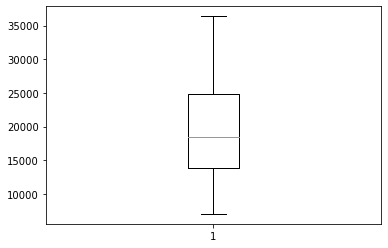

In [131]:
#visualize outliers with boxplot
plt.boxplot(final["price"])

In [132]:
final["kilometers"].describe()

count       709.000000
mean      24840.977433
std       17551.850064
min           1.000000
25%       13149.000000
50%       20790.000000
75%       28286.000000
max      117947.000000
Name: kilometers, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1234ad90>,
 'caps': [<matplotlib.lines.Line2D at 0x12357118>,
 'boxes': [<matplotlib.lines.Line2D at 0x1234abe0>],
 'medians': [<matplotlib.lines.Line2D at 0x12357478>],
 'fliers': [<matplotlib.lines.Line2D at 0x123575f8>],
 'means': []}

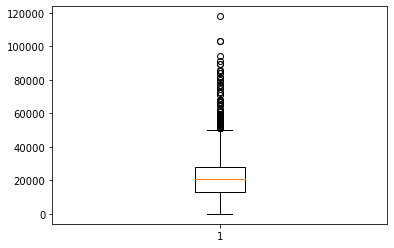

In [133]:
#visualize outliers with boxplot
plt.boxplot(final["kilometers"])

In [134]:
# Upper outlier threshold  Q3 + 1.5(IQR)
max_threshold=28020 + 1.5*(28020-13086)
max_threshold

50421.0

In [135]:
# Removing outliers
df3=final[final.kilometers<max_threshold]
# recalculate summary statistics
df3["kilometers"].describe()

count      637.000000
mean     20181.868132
std      10224.630360
min          1.000000
25%      12420.000000
50%      19290.000000
75%      25219.000000
max      49940.000000
Name: kilometers, dtype: float64

In [136]:
# using only cars with clean vehicle status
df4=df3[df3["title_status"]=="clean vehicle"]

## Preparing data for model

In [137]:
df4.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,kilometers
1,2367,11300,nissan,sentra,2019,clean vehicle,26930.0,gray,3n1ab7apxky263126,167615743,minnesota,usa,14 hours left,16737.0
2,2175,14400,ford,fusion,2018,clean vehicle,38148.0,black,3fa6p0ru4jr247959,167749350,pennsylvania,usa,2 days left,23709.0
3,135,24005,chevrolet,1500,2017,clean vehicle,51293.0,beige,1gcukrecxhf153500,167765146,michigan,usa,20 hours left,31879.0
4,637,13500,chevrolet,chev_door,2017,clean vehicle,46497.0,white,1g1ze5stxhf257679,167779687,wisconsin,usa,21 hours left,28898.0
5,863,23300,dodge,charger,2018,clean vehicle,5359.0,blue,2c3cdxbgxjh273288,167778965,wisconsin,usa,2 days left,3331.0


In [138]:
df5=df4.drop(["Unnamed: 0","mileage","vin","lot","state","country","condition","title_status","color"],axis=1)
df5.head()

,price,brand,model,year,kilometers
1,11300,nissan,sentra,2019,16737.0
2,14400,ford,fusion,2018,23709.0
3,24005,chevrolet,1500,2017,31879.0
4,13500,chevrolet,chev_door,2017,28898.0
5,23300,dodge,charger,2018,3331.0


In [139]:
def discover_categorical_columns(df):
    """
    This function takes dataframe as an input, goes through columns in a dataframe to check if column is of an object type.
    If the colunm is of an object type it means column contains categorical variables. Function than prints all unique 
    categorical values of a column
    
    Args: 
        df (pd.DataFrame) - only requried argument for the function
        
    Returns:
        Prints unique categorical values for object type columns.
    """
    for column in df:
        if df[column].dtype=='object':
            print('{} : {}'.format(column, df[column].unique()))

In [140]:
discover_categorical_columns(df5)

brand : ['nissan' 'ford' 'chevrolet' 'dodge']
model : ['sentra' 'fusion' '1500' 'chev_door' 'charger' 'f-150' 'versa' 'max'
 'door' 'durango' 'rogue' 'sport' 'nissan_door' 'transit' 'journey'
 'explorer' 'escape' 'challenger' 'doors' 'door_dodge']


In [141]:
# replace brands with numbers (0-3)
df5.replace({'ford':0 ,'dodge':1 ,'nissan':2, 'chevrolet':3}, value=None, inplace=True)

In [142]:
# replace models with numbers (0-7)
df5.replace({'versa':0, 'f-150':1, 'doors':2 ,'chev_door':3 ,'charger':4 ,'fusion':5 ,'explorer':6,
 'transit':7 ,'rogue':8 ,'door_dodge':9 ,'journey':10 ,'durango':11 ,'door':12 ,'sport':13,
 'challenger':14 ,'1500':15, 'escape':16 ,'sentra':17, 'nissan_door':18 ,'max':19}, value=None, inplace=True)

In [143]:
df5.sample(10)

,price,brand,model,year,kilometers
424,16500,0,5,2019,21642.0
453,23400,0,7,2019,9453.0
250,27502,0,1,2019,10035.0
53,21500,1,14,2018,4194.0
211,13900,2,8,2018,24789.0
635,10300,2,17,2018,24794.0
630,14900,2,8,2019,16480.0
609,28500,0,1,2019,8331.0
201,21003,3,15,2016,27418.0
175,26900,0,1,2018,25790.0


### Scaling

In [144]:
# min-max scaling
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

### Splitting data set

In [145]:
# Defining features and  target column
scaled_X = sx.fit_transform(df5.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df5['price'].values.reshape(df5.shape[0],1))

scaled_X[:10]

array([[0.66666667, 0.89473684, 0.88888889, 0.33512886],
       [0.        , 0.26315789, 0.77777778, 0.47473918],
       [1.        , 0.78947368, 0.66666667, 0.63833877],
       [1.        , 0.15789474, 0.66666667, 0.57864595],
       [0.33333333, 0.21052632, 0.77777778, 0.06668135],
       [0.        , 0.05263158, 0.88888889, 0.22615591],
       [0.66666667, 0.89473684, 0.88888889, 0.31436352],
       [0.66666667, 0.        , 0.77777778, 0.63309237],
       [0.66666667, 0.        , 0.77777778, 0.43000461],
       [0.        , 1.        , 0.88888889, 0.45567592]])

In [146]:
#Transponse X (converting from rows to columns)
scaled_X.T[:10]

array([[0.66666667, 0.        , 1.        , ..., 0.        , 0.33333333,
        1.        ],
       [0.89473684, 0.26315789, 0.78947368, ..., 0.05263158, 0.52631579,
        0.78947368],
       [0.88888889, 0.77777778, 0.66666667, ..., 0.77777778, 0.88888889,
        0.66666667],
       [0.33512886, 0.47473918, 0.63833877, ..., 0.51182443, 0.40939947,
        0.38869421]])

In [147]:
#calculating weights
w=np.ones(shape=(4)) 
w

array([1., 1., 1., 1.])

In [148]:
np.dot(w,scaled_X.T)[:10]

array([2.78542125, 1.51567485, 3.09447912, 2.40320735, 1.38831878,
       1.16767638, 2.76465592, 2.07753682, 1.87444905, 2.34456481])

In [149]:
scaled_y[:10]

array([[0.14334471],
       [0.24914676],
       [0.57696246],
       [0.21843003],
       [0.55290102],
       [0.66559727],
       [0.16723549],
       [0.03071672],
       [0.07167235],
       [1.        ]])

## Batch gradient descent

In [150]:
def batch_gradient_descent(scaled_X, y_true, epochs, learning_rate = 0.01):

    number_of_features = scaled_X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 4 (brand, model,year,kilometers)
    w = np.ones(shape=(number_of_features)) 
    b = 0 #bias
    total_samples = scaled_X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, scaled_X.T) + b  # price = w1*brand +w2*model +w3*year + w4*color + w5*kilometers + bias

        w_grad = -(2/total_samples)*(scaled_X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w, b, cost

(array([-0.24424035, -0.05469754,  0.19526283, -0.2303867 ]),
 0.45785994467486957,
 0.03709171327916102)

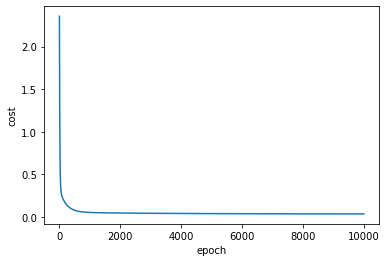

In [151]:
#plotting how much cost reduces by epoch
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [152]:
def predict(brand,model,year,kilometers,w,b):
    scaled_X =sx.transform([[brand,model,year,kilometers]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2]  and bias is b
    # equation for price is w1*brand + w2*model + w3*year + w3*kilometers+  + bias
    # scaled_X[0] is year
    # scaled_X[1] is kilometers
    # scaled_X[2] is chevrolet
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + w[2] * scaled_X[2]+w[3] * scaled_X[3]  + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]


In [163]:
df5.sample(8)

,price,brand,model,year,kilometers
305,31700,1,11,2019,16500.0
92,19500,0,12,2015,49940.0
58,10300,2,17,2018,25263.0
585,23911,0,1,2017,15971.0
222,9200,2,0,2018,21012.0
44,27000,0,1,2019,8247.0
562,17000,3,3,2016,16454.0
479,15400,0,5,2019,19344.0


In [164]:
print("Price(305):",predict(1,11,2019,16500.0,w,b))
print("Price(92):",predict(0,12,2015,49940.0,w,b))
print("Price(58):",predict(2,17,2018,25263.0,w,b))
print("Price(585):",predict(0,1,2017,15971.0,w,b))
print("Price(222):",predict(2,0,2018,21012.0,w,b))
print("Price(44):",predict(0,1,2019,8247.0,w,b))
print("Price(562):",predict(3,3,2016,16454.00,w,b))
print("Price(479):",predict(0,5,2019,19344.0,w,b))

Price(305): 20057.356240419544
Price(92): 15295.529549963705
Price(58): 15345.64896350428
Price(585): 22086.391786015673
Price(222): 17354.202337546234
Price(44): 24401.83453640044
Price(562): 14060.473948066225
Price(479): 22564.438751392983


We didn't get accurate results from certain cars. The model predicted lower values for cars that have more kilometers and years. For better results we must have more accurate data and if we used only one brand car the results would be better.

## Stochastic Gradient Descent

In [155]:
# we will use random libary to pick random training sample.
import random
random.randint(0,6) # randit gives random number between two numbers specified in the argument

0

In [156]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),1000000)
w_sgd, b_sgd, cost_sgd

(array([-0.2522251 , -0.03913764,  0.75310595,  0.20830925]),
 -0.1572741995971265,
 0.133499671527644)

In [157]:
w, b, cost

(array([-0.24424035, -0.05469754,  0.19526283, -0.2303867 ]),
 0.45785994467486957,
 0.03709171327916102)

We can see that we've got different bias and cost(error) from batch gradient descent and stohastic gradient descent

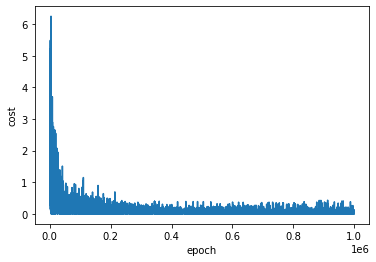

In [158]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [159]:
df5.sample(8)

,price,brand,model,year,kilometers
341,27102,0,1,2019,12439.0
675,16900,1,10,2019,18761.0
102,13900,0,5,2019,18417.0
628,22500,0,12,2016,31338.0
452,26000,1,11,2017,35524.0
193,13200,3,3,2017,31329.0
621,22200,0,7,2019,9815.0
612,16800,1,10,2019,18012.0


In [165]:
print("Price(341):",predict(0,1,2019,12439.0,w_sgd,b_sgd))
print("Price(675):",predict(1,10,2019,18761.0,w_sgd,b_sgd))
print("Price(102):",predict(0,5,2019,18417.0,w_sgd,b_sgd))
print("Price(628):",predict(0,12,2016,31338.0,w_sgd,b_sgd))
print("Price(452):",predict(1,11,2017,35524.0,w_sgd,b_sgd))
print("Price(193):",predict(3,3,2017,31329.0,w_sgd,b_sgd))
print("Price(621):",predict(0,7,2019,9815.0,w_sgd,b_sgd))
print("Price(612):",predict(1,10,2019,18012.0,w_sgd,b_sgd))

Price(341): 23565.889260617343
Price(675): 21331.965824938066
Price(102): 24055.092971270762
Price(628): 17856.460644912113
Price(452): 18416.80074739844
Price(193): 13460.132879338345
Price(621): 22883.06219904606
Price(612): 21240.424298060658


Just like with batch gradient desecent,stohastic gradient descent gave us some results  that are not reliable for some cars.